
# Project: Investigate tmdb movies data set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#reconstruct">Columns Restructuring</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

#### the movie industry is one of the biggest in the world so we have to analyze the outcome data from this industry frequently , In order to improve it
#### Foetunately , I have a quite large data set contains data about movies from 1960 to 2015 , so I will use this data set to answer the following questions:
#### 1.a ) which genre gained the most revenue?
#### 1.b ) which genre costed the most budget?
#### 1.c ) which genre has the highest rate?
#### 2 ) which month landed the most revenue?
#### 3 ) Is there a relationship beteen the run_time of the movie and the vote it might gets?
#### 4 ) who is the dominate director in terms of revenue?


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# Change floats from displaying in scientific notation
pd.options.display.float_format = '{:20,.2f}'.format

<a id='wrangling'></a>
## Data Wrangling & Cleaning


### General Properties

First we load the data set to take a quick look at its structure

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,"137,999,939.28","348,161,292.49"
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,"101,199,955.47","271,619,025.41"
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,"183,999,919.04","1,902,723,129.80"
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,"174,799,923.09","1,385,748,801.47"


So we notice here that we have a 21-column data set ! ..
But not all these columns will participate at our conquest to solve the upcoming questions , so I will terminate some of these
columns and I will justify for that briefly.

I will remove the following columns:
"id","imdb_id","popularity","budget","revenue","original_title","cast","homepage","tagline","keywords","overview","production_companies","vote_count"

# But Why?
well the the reason varies actually ..
both "id" and "imdb_id" have been created to distinguish each case and that is something I don't need to answer the upcoming questions.


all of the "original_title","homepage","tagline","keywords","overview" columns are adittional information about each case which is irrelevant to the upcoming questions.


In this data set we have cases from 1960 till 2015 and the value of the money differs accounting for inflation over time so it would be wrong if we compared there budget and revenue values to each other so we drop the "budget","revenue" and instead of them we use "budget_adj" "revenue_adj" which show the budget and revenue of the associated movie in terms of 2010 dollars.


"cast",""production_companies","vote_count","release_year" I wouldn't call them usless information .. of course not 
they're just irrelevant to the questions I will try to answer so why carrying them around?


"popularity" .. well it surprised me to that I wil not use that column for instance to investigate which is the most popular movie genre but the reason is the data in this column is extremly skewed and dosen't make any sense to me so I dropes that column and used the "vote_average" column instead which is normally distributed.

# "popularity" vs "vote_average"

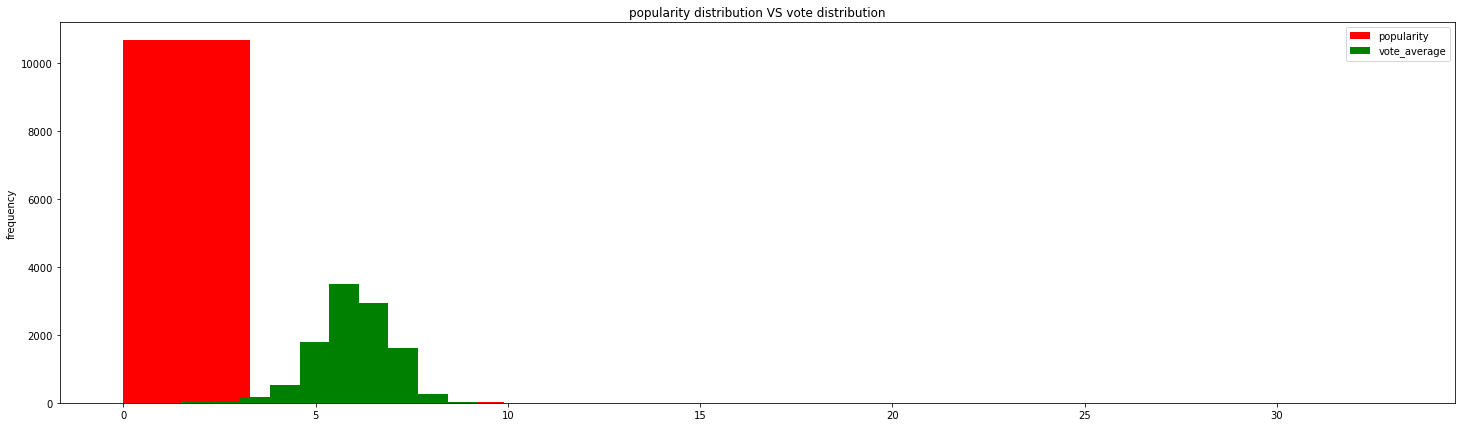

In [16]:
f, ax = plt.subplots(figsize=(25,7))
plt.hist(df.popularity , facecolor="r" , label="popularity")
plt.hist(df.vote_average , facecolor="g" , label="vote_average")
plt.legend()
plt.ylabel("frequency")
plt.title("popularity distribution VS vote distribution");

the visualization above make it so obvious how the "popularity" data is extremly skewed and with the data on that shape ,I can't answer question like "what is the most popular movie genre ?" .. on the other hand , the "vote_average" column is normally distributed , so I can answer a similar question " which movie genre scored the highest vote?" 


In [17]:
df.drop(["id","imdb_id","popularity","budget","revenue","original_title","cast","homepage","tagline","keywords","overview","production_companies","vote_count","release_year"], axis = 1 , inplace=True)


In [18]:
df.head()

,director,runtime,genres,release_date,vote_average,budget_adj,revenue_adj
0,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.50,"137,999,939.28","1,392,445,892.52"
1,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.10,"137,999,939.28","348,161,292.49"
2,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,6.30,"101,199,955.47","271,619,025.41"
3,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.50,"183,999,919.04","1,902,723,129.80"
4,James Wan,137,Action|Crime|Thriller,4/1/15,7.30,"174,799,923.09","1,385,748,801.47"


Now let's have an abstract look at the remaining column 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   director      10822 non-null  object 
 1   runtime       10866 non-null  int64  
 2   genres        10843 non-null  object 
 3   release_date  10866 non-null  object 
 4   vote_average  10866 non-null  float64
 5   budget_adj    10866 non-null  float64
 6   revenue_adj   10866 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 594.4+ KB


We notice that not all the columns cotain the same number of observations ( Null values )... Let's handle that

In [20]:
df.isnull().sum()

director        44
runtime          0
genres          23
release_date     0
vote_average     0
budget_adj       0
revenue_adj      0
dtype: int64

In [21]:
df.shape

(10866, 7)

So it appears that the "director" , "genres" columns have null values .. And I chose to handle them by simply drop them 
# But why?
the data set have 10866 rows and at the worst case I could've only deleted just 67 rows , so given the size of our data set that shouldn't affect my analysis

In [22]:
df.dropna(axis=0,inplace = True)

In [23]:
df.isnull().sum()

director        0
runtime         0
genres          0
release_date    0
vote_average    0
budget_adj      0
revenue_adj     0
dtype: int64

In [24]:
df.shape

(10801, 7)

checking for duplicated rows

In [25]:
df.duplicated().sum()

1

So we do have one duplicated row .. Let's drop it

In [26]:
df.drop_duplicates(inplace=True)

In [27]:
#checking 
df.duplicated().any()

False

In [28]:
df.shape

(10800, 7)

I always intend to have a quick look at the excel sheet itself , that helps me figuring out more problems with my data .
When I looked at this excel sheet , I noticed many cases which have zero values in the "budget_adj"	, "revenue_adj" columns .
Let's see how many rows have this issue and how we could handle it.

In [29]:
df.query("(budget_adj == 0) or (revenue_adj == 0)").shape[0]

6947

6947 row !!!! .. That's alot and those observations will affect the results of the mean function I will apply it later so I've got to remove these rows. 

In [30]:
# let's get the indices of the rows where budget_adj = 0
indl=df.index[df['budget_adj'] == 0].tolist()

In [31]:
# now let's drop them
df.drop(indl,inplace=True)

In [32]:
# checking
df.index[df['budget_adj'] == 0].tolist()

[]

In [33]:
# we do the same for the rows that have "revenue_adj=0"
df.drop(df.index[df['revenue_adj'] == 0].tolist(),inplace=True)

In [34]:
# checking that we've removed the 6947 rows
df.query("(budget_adj == 0) or (revenue_adj == 0)").shape[0]

0

Now we have a cleaner data and we will use this data to answer our questions but the problem is we can't use this data at its current structure so we have to restructure some of these columns as follows in the next section

<a id='reconstruct'></a>
# Columns Restructuring

### The single movie goes under different genres ..takinng "Jurassic World" for example , it goes under "Action|Adventure|Science Fiction|Thriller" and here's the problem .. I wanna answer different questions abost each seprated genre like "Which was the most profitable movie genre simce 1960??" , in order to do so I have to first find each genre in the data set then somehow determine if a certain movie goes under a certain genre or not .
# Let's break that down!

In [35]:
# here's how I found each unique genre in the dataset
genre_list=[]
for genres in df['genres'].iteritems():
    genre_list.extend(genres[1].split("|"))
ugenres=set(genre_list)
ugenres

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [36]:
# then I featured a new columnn for each genre contains a boolean values of whether the film of the row goes under that genre or not.
for genre in ugenres:
    df[genre] = df["genres"].str.contains(genre)

In [37]:
# let's take a look
df.head()

,director,runtime,genres,release_date,vote_average,budget_adj,revenue_adj,Foreign,Mystery,TV Movie,...,Family,Adventure,History,Western,Animation,War,Fantasy,Action,Science Fiction,Drama
0,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.50,"137,999,939.28","1,392,445,892.52",False,False,False,...,False,True,False,False,False,False,False,True,True,False
1,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.10,"137,999,939.28","348,161,292.49",False,False,False,...,False,True,False,False,False,False,False,True,True,False
2,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,6.30,"101,199,955.47","271,619,025.41",False,False,False,...,False,True,False,False,False,False,False,False,True,False
3,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.50,"183,999,919.04","1,902,723,129.80",False,False,False,...,False,True,False,False,False,False,True,True,True,False
4,James Wan,137,Action|Crime|Thriller,4/1/15,7.30,"174,799,923.09","1,385,748,801.47",False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [38]:
# then I droped the genre column .. It's not valuable to my analysis any more.
df.drop(["genres"],axis=1,inplace=True)

In [39]:
# the shape of the dataframe now becomes..
df.shape

(3853, 26)

### the second issue I wanna fix before answering my questions is the "release_date" column ... the thing is I just want the month value from that column to answer a future qustion , so I have to terminate the rest of the date information.

In [40]:
df["release_date"]=df["release_date"].apply(lambda x: x.split("/")[0])

In [41]:
# let's take a look
df.head()

,director,runtime,release_date,vote_average,budget_adj,revenue_adj,Foreign,Mystery,TV Movie,Documentary,...,Family,Adventure,History,Western,Animation,War,Fantasy,Action,Science Fiction,Drama
0,Colin Trevorrow,124,6,6.50,"137,999,939.28","1,392,445,892.52",False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
1,George Miller,120,5,7.10,"137,999,939.28","348,161,292.49",False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
2,Robert Schwentke,119,3,6.30,"101,199,955.47","271,619,025.41",False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
3,J.J. Abrams,136,12,7.50,"183,999,919.04","1,902,723,129.80",False,False,False,False,...,False,True,False,False,False,False,True,True,True,False
4,James Wan,137,4,7.30,"174,799,923.09","1,385,748,801.47",False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [42]:
# in this cell I just wanted to make sure the months values are valid
df.release_date.unique()

array(['6', '5', '3', '12', '4', '9', '10', '2', '1', '7', '11', '8'],
      dtype=object)

<a id='eda'></a>
## Exploratory Data Analysis



### Question one 
#### 1.a ) which genre gained the most revenue?
#### 1.b ) which genre costed the most budget?
#### 1.c ) which genre has the highest rate?

## to answer these questions I have to fachion a brand new data frame contain the mean_budget_adj , mean_revenue_adj , mean_vote for columns each genre.

In [43]:
# This dictionary will be used to create a new data frame
# the keys of this dictionary are the parameters I want to evaluate for each genre separately
new_df_dict = {"mean_revenue_adj": {},"mean_budget_adj" : {} ,"mean_vote": {} }


# here we make use of the boolean columns I featured earlier to mask of the dataframe for each genre and Use that mask to calcu-
# ate the values of the prameters I'm interested in and then assign these values to the dictionary above respectively.
for genre in ugenres :
    
    mean_bud_adj = df[df[genre]]['budget_adj'].mean()  
    new_df_dict['mean_budget_adj'][genre] = mean_bud_adj
    
    mean_rev_adj = df[df[genre]]['revenue_adj'].mean()
    new_df_dict['mean_revenue_adj'][genre] = mean_rev_adj
    
    mean_vote = df[df[genre]]["vote_average"].mean()
    new_df_dict["mean_vote"][genre] = mean_vote

# Create and sort the data frame
# let's just sort the new_df by thr revenue column for now
new_df = pd.DataFrame.from_dict(new_df_dict)
new_df.sort_values(by=["mean_revenue_adj"],inplace=True)
new_df

,mean_revenue_adj,mean_budget_adj,mean_vote
Foreign,"12,866,538.21","13,620,307.87",6.15
Documentary,"24,806,165.83","5,379,701.63",6.66
TV Movie,"58,389,103.04","6,951,083.69",5.60
Horror,"81,406,555.10","23,240,712.11",5.71
Drama,"101,429,884.17","34,729,830.68",6.40
Crime,"110,395,135.21","39,910,067.93",6.30
Mystery,"113,621,019.76","42,362,641.38",6.19
Romance,"113,673,567.75","33,948,856.00",6.19
Comedy,"121,389,713.41","39,202,214.59",6.03
History,"121,661,724.41","56,879,848.02",6.58


## Bingo!! now we have our findings , let's visualize the first answer!

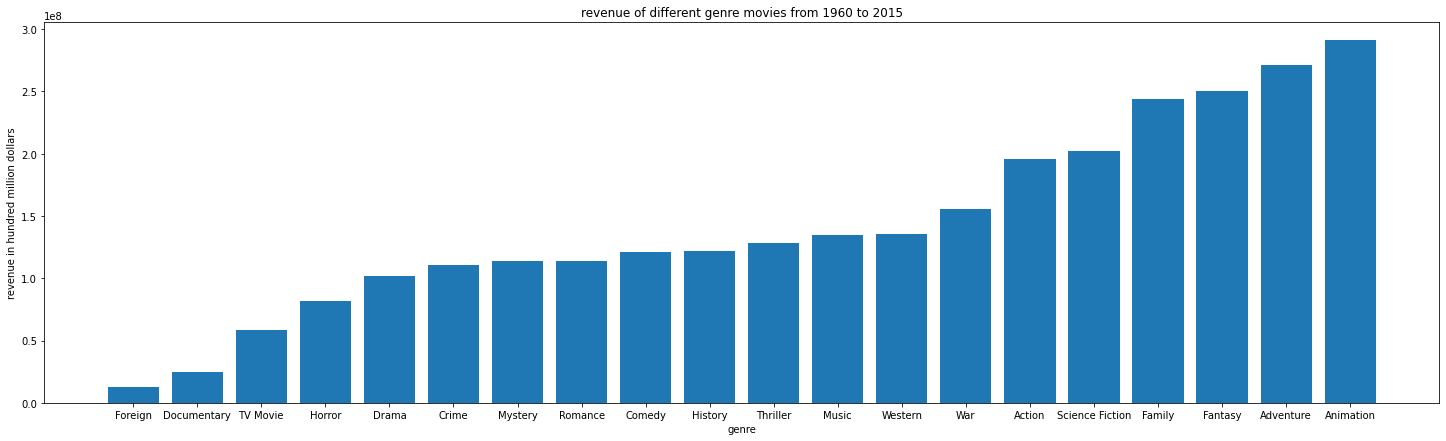

In [44]:
f, ax = plt.subplots(figsize=(25,7))
plt.xticks(np.arange(len(new_df.index)),new_df.index)
plt.bar(np.arange(len(new_df.index)),new_df.mean_revenue_adj.values)
plt.title("revenue of different genre movies from 1960 to 2015")
plt.xlabel("genre")
plt.ylabel("revenue in hundred million dollars");

So from the visualization above we can see that "Animation" is the most profitable genre whereas "Foreign" was the least profitable.

### let's prepare the second answer and visualize it!

In [45]:
# first we have to sort the new_df by the "mean_budget_adj" column
new_df.sort_values(by=["mean_budget_adj"],inplace=True)
new_df

,mean_revenue_adj,mean_budget_adj,mean_vote
Documentary,"24,806,165.83","5,379,701.63",6.66
TV Movie,"58,389,103.04","6,951,083.69",5.60
Foreign,"12,866,538.21","13,620,307.87",6.15
Horror,"81,406,555.10","23,240,712.11",5.71
Romance,"113,673,567.75","33,948,856.00",6.19
Drama,"101,429,884.17","34,729,830.68",6.40
Music,"134,566,015.89","35,198,015.22",6.32
Comedy,"121,389,713.41","39,202,214.59",6.03
Crime,"110,395,135.21","39,910,067.93",6.30
Mystery,"113,621,019.76","42,362,641.38",6.19


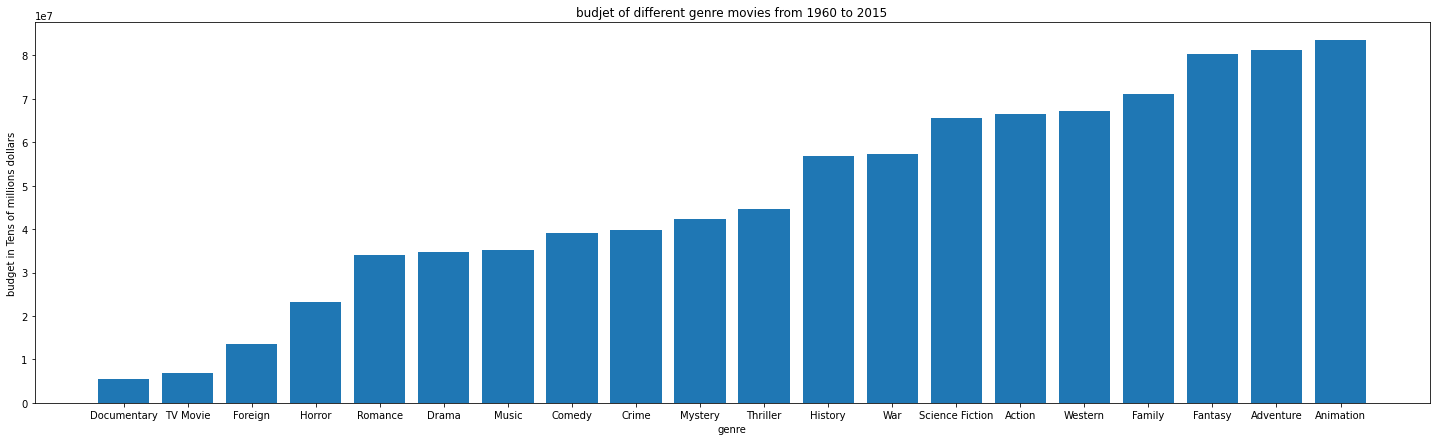

In [46]:
f, ax = plt.subplots(figsize=(25,7))
plt.xticks(np.arange(len(new_df.index)),new_df.index)
plt.bar(np.arange(len(new_df.index)),new_df.mean_budget_adj.values)
plt.title("budjet of different genre movies from 1960 to 2015")
plt.xlabel("genre")
plt.ylabel("budget in Tens of millions dollars");

So from the visualization above we can see that "Animation" genre costed the most whereas "Documentary" genre costed the least.

### the third answer

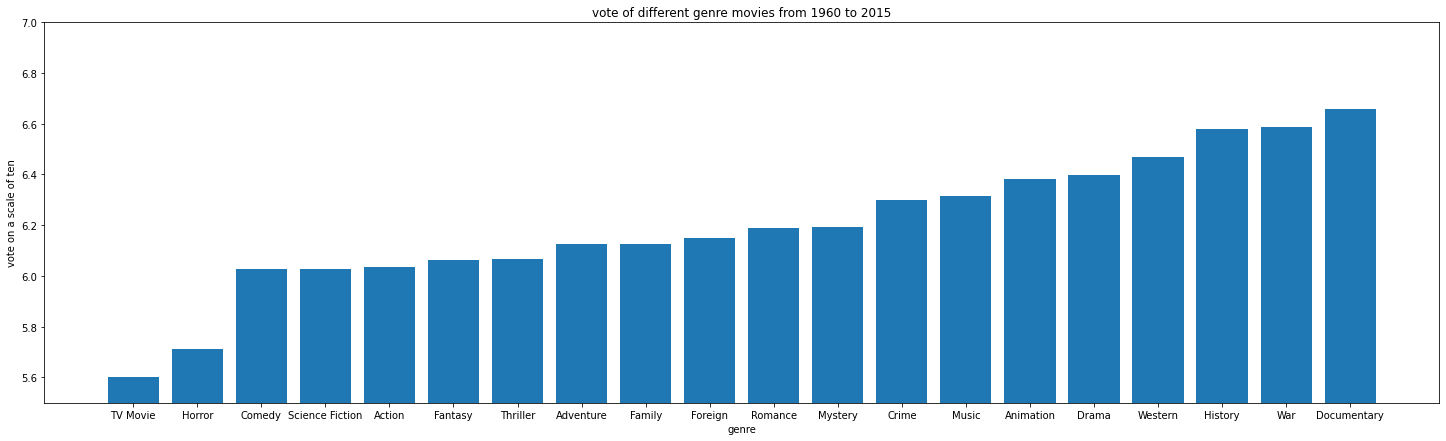

In [48]:
new_df.sort_values(by=["mean_vote"],inplace=True)
f, ax = plt.subplots(figsize=(25,7))
plt.xticks(np.arange(len(new_df.index)),new_df.index)
plt.bar(np.arange(len(new_df.index)),new_df.mean_vote.values)
plt.title("vote of different genre movies from 1960 to 2015")
plt.xlabel("genre")
plt.ylabel("vote on a scale of ten")
# In order to see the difference between the mean_vote values which are very close to one another , I changed the limit of the
# y axis to start at 5.5 .
ax = plt.gca()
ax.set_ylim([5.5,7]);

So from the visualization above we can see that "Documentary" was the critics favourite with a mean vote of 6.66 and "TV Movie" was their least favourite with a mean vote of 5.6 

### Question two
#### which month landed the most revenue?

##### the movie industry , like any other industry , gets affected by the time you choose to release your products , so I thought it may be useful to see in which month movies achieve the highest revenue.

In [49]:
# to answer this question , simply we have to groupby each month and calculate the mean of the revenye gained in this month
s=df.groupby("release_date").revenue_adj.mean().sort_values(ascending=True)

In [50]:
s.index

Index(['9', '1', '2', '8', '10', '4', '3', '7', '11', '12', '5', '6'], dtype='object', name='release_date')

In [51]:
s.values

array([6.33089705e+07, 7.14605982e+07, 8.33281379e+07, 8.91807762e+07,
       1.01246156e+08, 1.11020284e+08, 1.32550634e+08, 1.75241830e+08,
       1.84670805e+08, 1.90175499e+08, 2.04727476e+08, 2.30441575e+08])

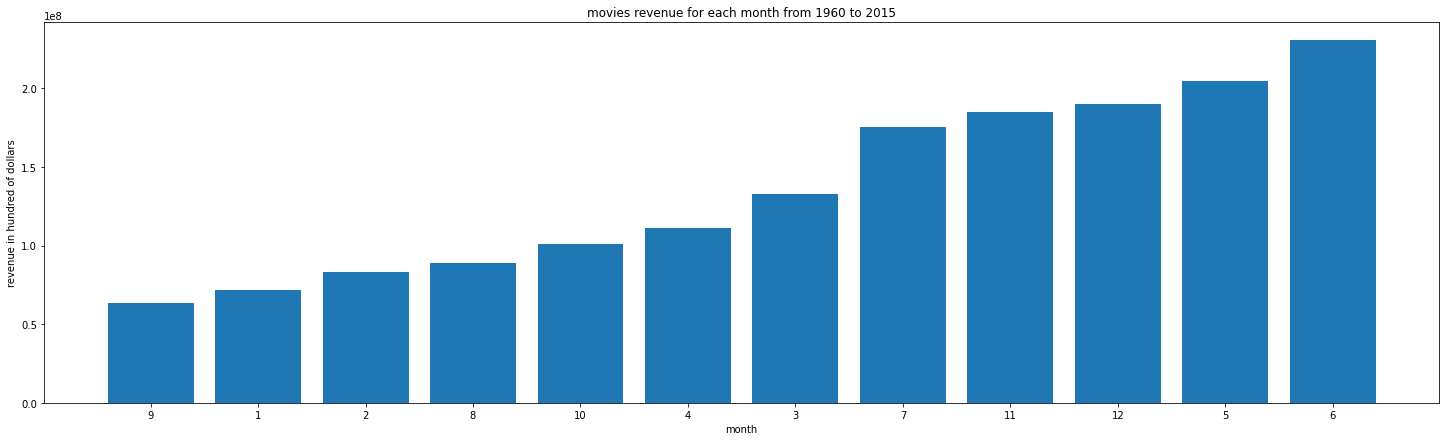

In [52]:
f, ax = plt.subplots(figsize=(25,7))
plt.xticks(np.arange(len(s.index)),s.index)
plt.bar(np.arange(len(s.index)),s.values)
plt.title("movies revenue for each month from 1960 to 2015")
plt.xlabel("month")
plt.ylabel("revenue in hundred of dollars");

So from the visualization above we can see that "June" was the best choice to release a movie whereas "Sebtember" was the worst. 

### Question three
#### Is there a relationship beteen the run_time of the movie and the vote it might gets?

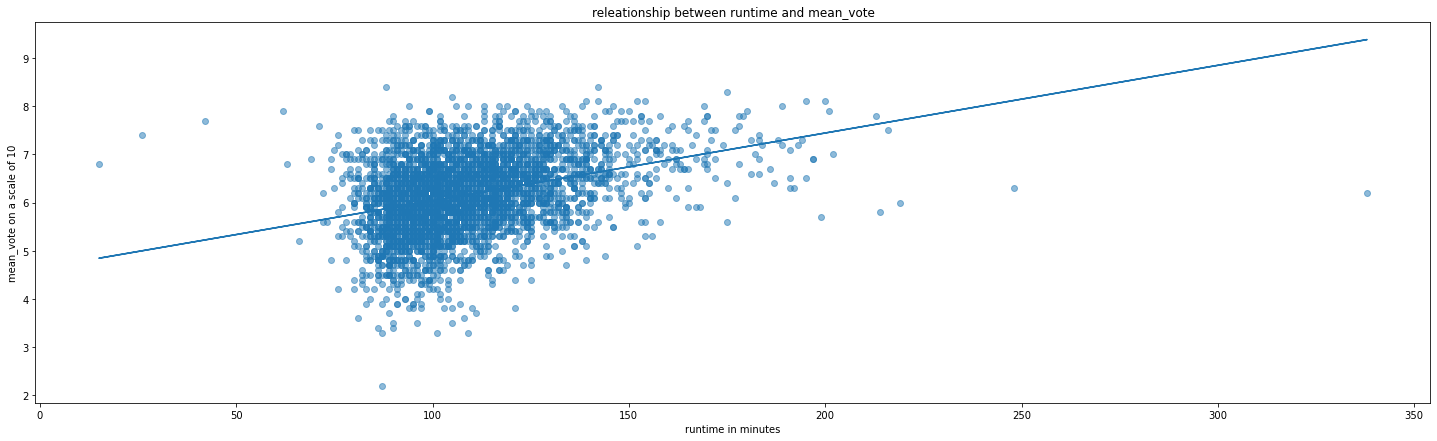

In [54]:
f, ax = plt.subplots(figsize=(25,7))
plt.scatter(df.runtime,df.vote_average,alpha=0.5)
m, b = np.polyfit(df.runtime,df.vote_average, 1)
plt.plot(df.runtime, m*df.runtime + b)
plt.title("releationship between runtime and mean_vote")
plt.xlabel("runtime in minutes")
plt.ylabel("mean_vote on a scale of 10");

So from the visualization above we can see that the is a positive releationship between the duration of the movie and the mean_vote of that movie.

### Question four
#### who is the dominate director in terms of revenue?

In [55]:
d_df=pd.DataFrame(df.groupby("director").revenue_adj.mean().sort_values(ascending=False))

In [56]:
top_ten=d_df.head(10).sort_values(by=["revenue_adj"])

In [57]:
top_ten

,revenue_adj
director,
David Yates,"1,044,363,814.81"
George Lucas,"1,052,319,860.44"
Andrew Adamson|Kelly Asbury|Conrad Vernon,"1,061,903,622.74"
Lee Unkrich,"1,063,171,911.00"
Kyle Balda|Pierre Coffin,"1,064,192,016.80"
Roger Allers|Rob Minkoff,"1,159,591,590.01"
Chris Buck|Jennifer Lee,"1,192,711,491.12"
Richard Marquand,"1,253,818,981.12"
Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,"1,574,814,739.70"


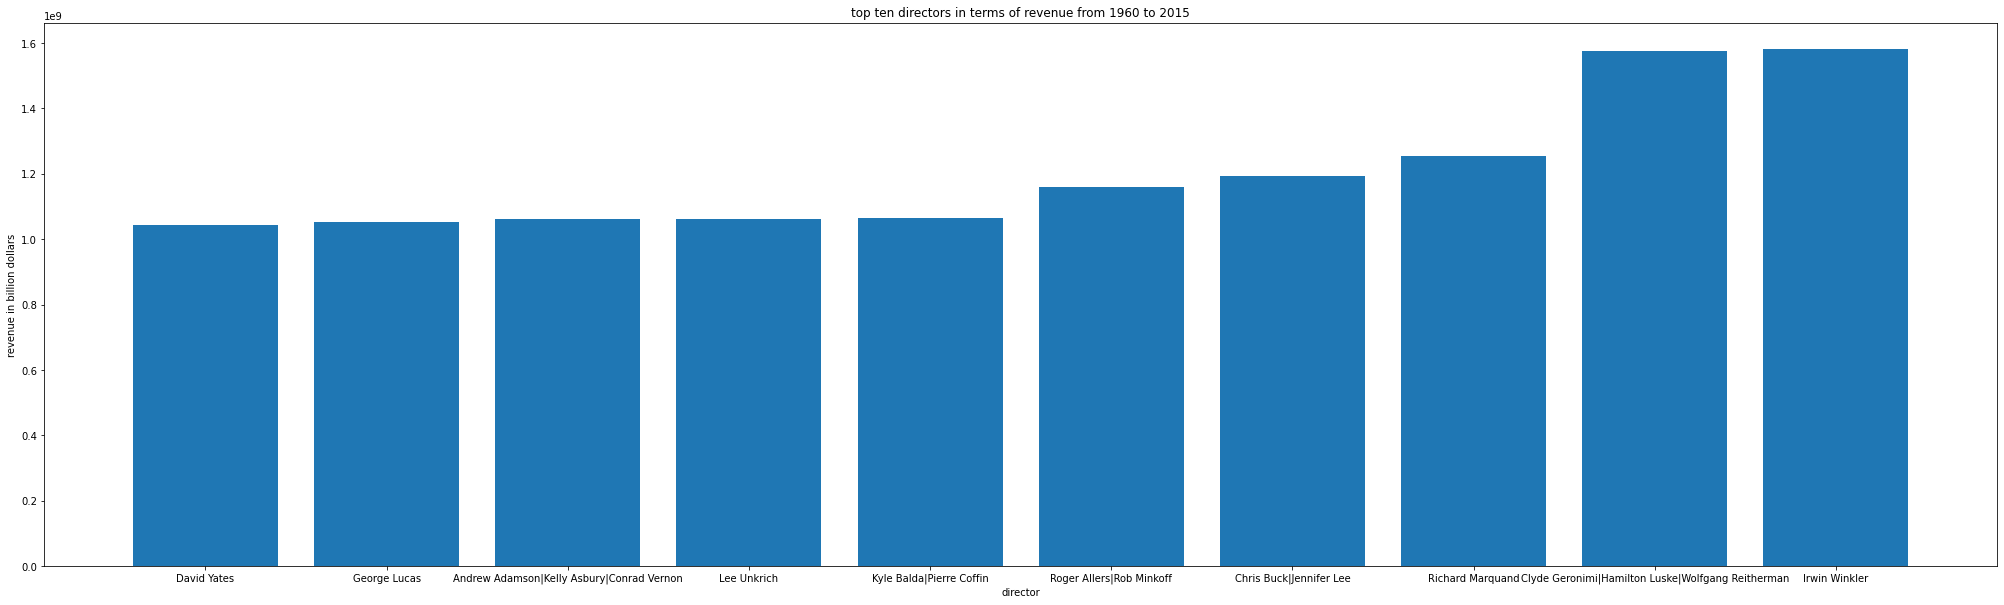

In [58]:
f, ax = plt.subplots(figsize=(35,10))
plt.xticks(np.arange(len(top_ten.index)),top_ten.index)
plt.bar(np.arange(len(top_ten.index)),top_ten.revenue_adj.values)
plt.title("top ten directors in terms of revenue from 1960 to 2015")
plt.xlabel("director")
plt.ylabel("revenue in billion dollars");

So here're our top ten directors in terms of revenue "Irwin Winkler" at the top of the list and "David Yates" at the tenth position. 

<a id='conclusions'></a>
## Conclusions
### From the answer of the first Questuon I conclude the following points:
#### The Animatiom,Adventure,Fantasy genres made it to the top three in terms of revenue but the also made it to the top three in terms of budget and order of the genres in the two plots didn't change that much so we can see that in order to get huge revenues , first you have to set fat production budgets.
#### intersting opservation also is that the Documentary genre was the first in terms of voting although it was the last in terms of revenue and the sec to the end in terms of budget , that tells us that setting a huge budget for a film doesn't mean the film will score high voting ..It's the critics call after all.
### From the answer of the sec Questuon I conclude the following points:
#### the top three month was June , May , December and that is pretty convenient ... June and may are the beginning of the summer and December is the holidays month.
#### the last three months were Septembre , January , February .. Septembre is the begining of the first semester and January , February are when the exams got hold . 
### From the answer of the third Questuon I conclude that there is a positive relationship between the length of the movie and the vote it might get


### Limitations
#### 1-  the data of the "popularity" column was so skewed and didn't make any sense.
#### 2-  6947 rows had either the "budget_adj" or the "revenue_adj" set to 0 , so I had to drop them .. that cost me half the size of my data set and I am sure that these columns would've changed the results of my analysis.
#### 3- I have used TMBD Movies dataset for my analysis which is limited to only the provided dataset. For example, the dataset does not confirm that every release of every director is listed.